In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score

In [46]:
iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

Посмотрим информацию о тренировочном и тестовом датасетах

In [47]:
iris_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    100 non-null    int64  
 1   sepal length  100 non-null    float64
 2   sepal width   100 non-null    float64
 3   petal length  100 non-null    float64
 4   petal width   100 non-null    float64
 5   species       100 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 4.8 KB


In [48]:
iris_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50 non-null     int64  
 1   sepal length  50 non-null     float64
 2   sepal width   50 non-null     float64
 3   petal length  50 non-null     float64
 4   petal width   50 non-null     float64
 5   species       50 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 2.5 KB


Подготовим тренировочный и тествовый датасеты для нашей модели

In [49]:
X_train = iris_train.drop(['Unnamed: 0', 'species'], axis=1)
y_train = iris_train['species']

In [50]:
X_test = iris_test.drop(['Unnamed: 0', 'species'], axis=1)
y_test = iris_test['species']

In [51]:
max_depth_values = range(1, 100)

In [52]:
scores_data = pd.DataFrame()

In [53]:
np.random.seed(0)

In [54]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [55]:
scores_data

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94


In [56]:
scores_data.sort_values('test_score', ascending=False).head(1)

,max_depth,train_score,test_score
0,83,1.0,0.94


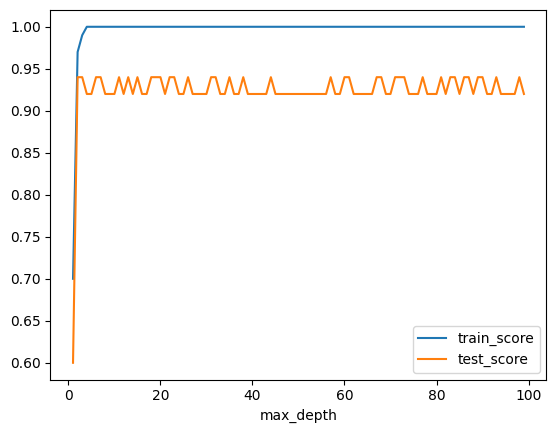

In [57]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score']);

Приблизим график

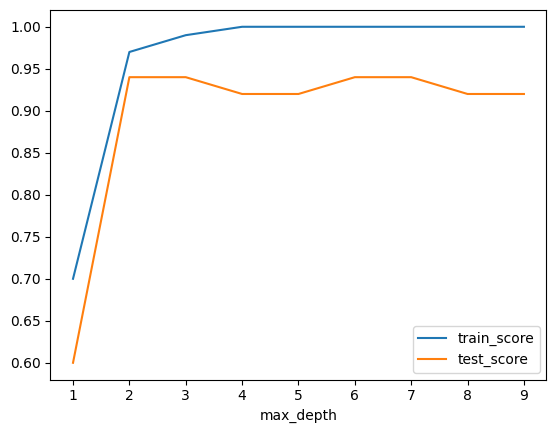

In [58]:
scores_data[scores_data['max_depth'] < 10].plot(x='max_depth', y=['train_score', 'test_score']);

In [59]:
max_depth = scores_data.sort_values('test_score', ascending=False).head(1)['max_depth'].values[0]
max_depth

83

In [60]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

In [61]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=83)

In [62]:
best_clf.score(X_test, y_test)

0.94

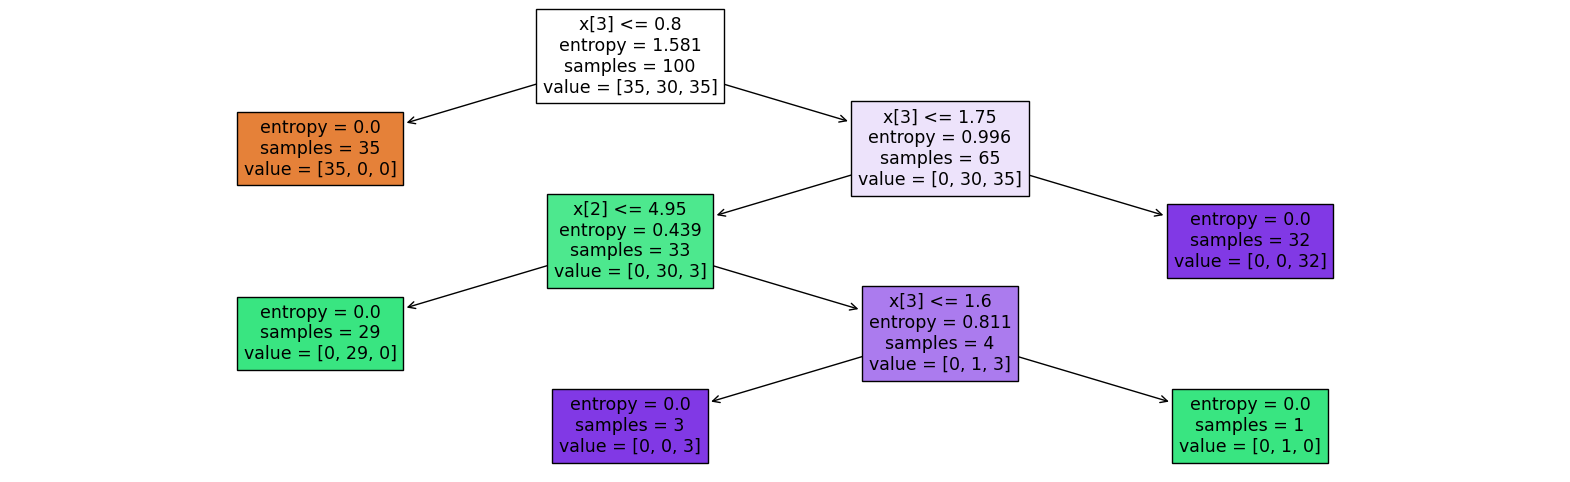

In [63]:
plt.figure(figsize=(20, 6))
plot_tree(best_clf, filled=True);